In [8]:
# Support for maths
import numpy as np
# Plotting tools
from matplotlib import pyplot as plt
# we use the following for plotting figures in jupyter
%matplotlib inline
# Importing data library
import pandas as pd

import seaborn as sns
sns.set_style(
    style='darkgrid', 
    rc={'axes.facecolor': '.9', 'grid.color': '.8'}
)
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

import warnings
warnings.filterwarnings('ignore')

# GPy: Gaussian processess libary
import GPy
from IPython.display import display

In [2]:
# Pembacaan File Data Polusi Udara ISPU Excel
DKI1 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI1")

In [3]:
# Menampilkan 5 Data pertama DKI1
DKI1

,Tanggal,Wilayah,PM10,SO2,CO,O3,NO2,Max,Critical,Kategori
0,2017-01-01,DKI1 (Bunderan HI),0.719512,0.314286,0.458333,0.092308,0.012821,0.300518,PM10,Sedang
1,2017-01-02,DKI1 (Bunderan HI),0.146341,0.295238,0.270833,0.082051,0.000000,0.139896,SO2,Baik
2,2017-01-03,DKI1 (Bunderan HI),0.170732,0.295238,0.291667,0.087179,0.012821,0.139896,SO2,Baik
3,2017-01-04,DKI1 (Bunderan HI),0.243902,0.295238,0.395833,0.087179,0.012821,0.139896,SO2,Baik
4,2017-01-05,DKI1 (Bunderan HI),0.304878,0.295238,0.458333,0.056410,0.012821,0.139896,SO2,Baik
...,...,...,...,...,...,...,...,...,...,...
1760,2021-10-27,DKI1 (Bunderan HI),0.621951,0.266667,0.250000,0.097436,0.487179,0.367876,PM25,SEDANG
1761,2021-10-28,DKI1 (Bunderan HI),0.573171,0.257143,0.270833,0.097436,0.487179,0.331606,PM25,SEDANG
1762,2021-10-29,DKI1 (Bunderan HI),0.560976,0.285714,0.333333,0.076923,0.435897,0.305699,PM25,SEDANG
1763,2021-10-30,DKI1 (Bunderan HI),0.536585,0.285714,0.187500,0.112821,0.500000,0.326425,PM25,SEDANG


In [6]:
# https://www.kaggle.com/code/lseiyjg/use-news-to-predict-stock-markets

train = DKI1[DKI1['Tanggal'] < '2021-01-01']
test = DKI1[DKI1['Tanggal'] > '2020-12-31']
test

,Tanggal,Wilayah,PM10,SO2,CO,O3,NO2,Max,Critical,Kategori
1461,2021-01-01,DKI1 (Bunderan HI),0.414634,0.266667,0.062500,0.143590,0.153846,0.248705,PM25,SEDANG
1462,2021-01-02,DKI1 (Bunderan HI),0.280488,0.247619,0.083333,0.225641,0.076923,0.217617,O3,BAIK
1463,2021-01-03,DKI1 (Bunderan HI),0.487805,0.228571,0.083333,0.189744,0.153846,0.274611,PM25,SEDANG
1464,2021-01-04,DKI1 (Bunderan HI),0.317073,0.219048,0.020833,0.148718,0.076923,0.222798,PM25,BAIK
1465,2021-01-05,DKI1 (Bunderan HI),0.414634,0.219048,0.062500,0.143590,0.102564,0.248705,PM25,SEDANG
...,...,...,...,...,...,...,...,...,...,...
1760,2021-10-27,DKI1 (Bunderan HI),0.621951,0.266667,0.250000,0.097436,0.487179,0.367876,PM25,SEDANG
1761,2021-10-28,DKI1 (Bunderan HI),0.573171,0.257143,0.270833,0.097436,0.487179,0.331606,PM25,SEDANG
1762,2021-10-29,DKI1 (Bunderan HI),0.560976,0.285714,0.333333,0.076923,0.435897,0.305699,PM25,SEDANG
1763,2021-10-30,DKI1 (Bunderan HI),0.536585,0.285714,0.187500,0.112821,0.500000,0.326425,PM25,SEDANG


In [32]:
X = np.array(DKI1['Tanggal'])
# X = np.array(DKI1.Tanggal.astype('int64') // 10**9)
Y = np.array(DKI1['PM10'])
X

array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
       '2017-01-03T00:00:00.000000000', ...,
       '2021-10-29T00:00:00.000000000', '2021-10-30T00:00:00.000000000',
       '2021-10-31T00:00:00.000000000'], dtype='datetime64[ns]')

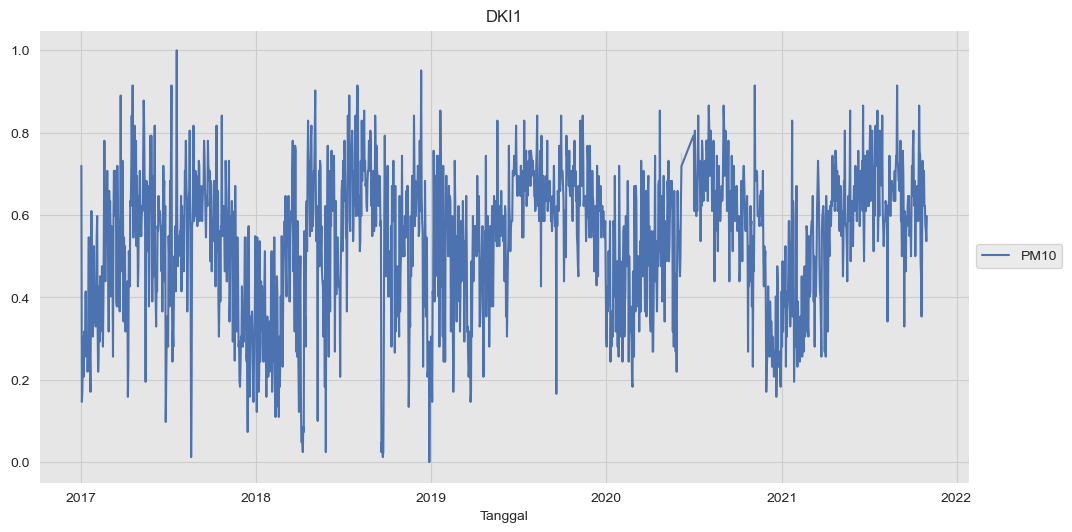

In [33]:
# Plot
fig, ax = plt.subplots()
sns.lineplot(x=X, y=Y, data=DKI1, color=sns_c[0], label='PM10', ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='DKI1', xlabel='Tanggal', ylabel='');

In [69]:
# Train Test X and Y Split
train_X = np.array(train['Tanggal'])
# train_X = np.array(train.Tanggal.astype('int64') // 10**9)
train_Y = np.array(train['PM10'])
# test_X = np.array(test.Tanggal.astype('int64') // 10**9)
test_X = np.array(test['Tanggal'])
test_Y = np.array(test['PM10'])

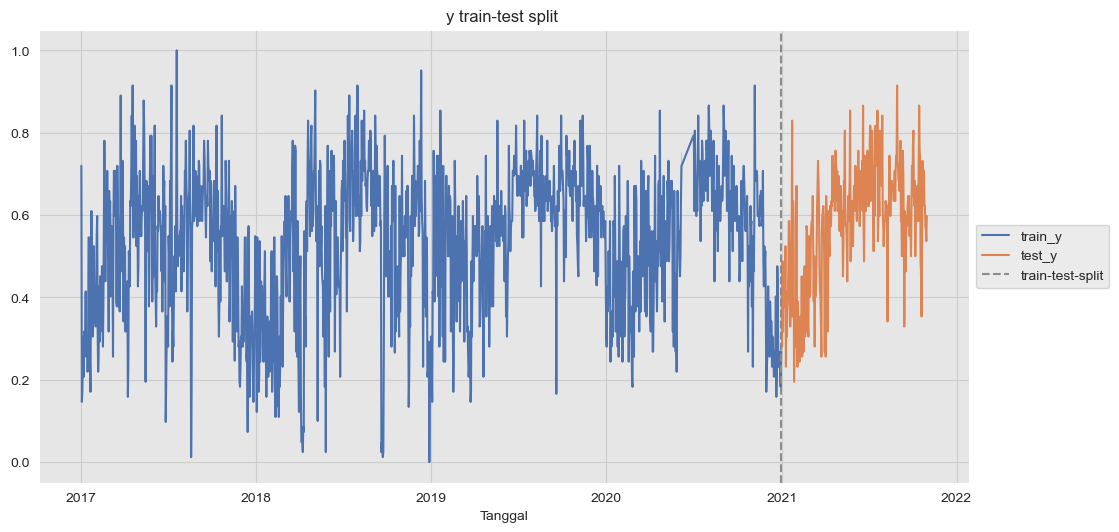

In [49]:
# Plot
fig, ax = plt.subplots()
sns.lineplot(x=train_X, y=train_Y, color=sns_c[0], label='train_y', ax=ax)
sns.lineplot(x=test_X, y=test_Y, color=sns_c[1], label='test_y', ax=ax)
ax.axvline(x=train_X[-1], color=sns_c[7], linestyle='--', label='train-test-split')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set(title='y train-test split ', xlabel='Tanggal', ylabel='');